In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
dfa=pd.read_csv('/content/Sample_for_AI.csv')
dfb=pd.read_csv('/content/Sample_for_BI.csv')
from google.colab import data_table


In [ ]:
dfa.describe()

,ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,4620.500000,3.445238,487.698268,2.362820
std,2667.502577,4.854853,548.021466,2.161418
min,1.000000,0.000000,0.000000,0.000000
25%,2310.750000,1.000000,12.000000,1.000000
50%,4620.500000,3.000000,248.000000,2.000000
75%,6930.250000,5.000000,936.000000,3.000000
max,9240.000000,251.000000,2272.000000,55.000000


In [3]:
dfa.info

<bound method DataFrame.info of         ID Purchased  ...             Specialization                   Origin
0        1        No  ...                        NaN                      API
1        2        No  ...                        NaN                      API
2        3       Yes  ...    Business Administration  Landing Page Submission
3        4        No  ...      Media and Advertising  Landing Page Submission
4        5       Yes  ...                        NaN  Landing Page Submission
...    ...       ...  ...                        ...                      ...
9235  9236       Yes  ...     IT Projects Management  Landing Page Submission
9236  9237        No  ...      Media and Advertising  Landing Page Submission
9237  9238        No  ...    Business Administration  Landing Page Submission
9238  9239       Yes  ...  Human Resource Management  Landing Page Submission
9239  9240       Yes  ...    Supply Chain Management  Landing Page Submission

[9240 rows x 9 columns]>

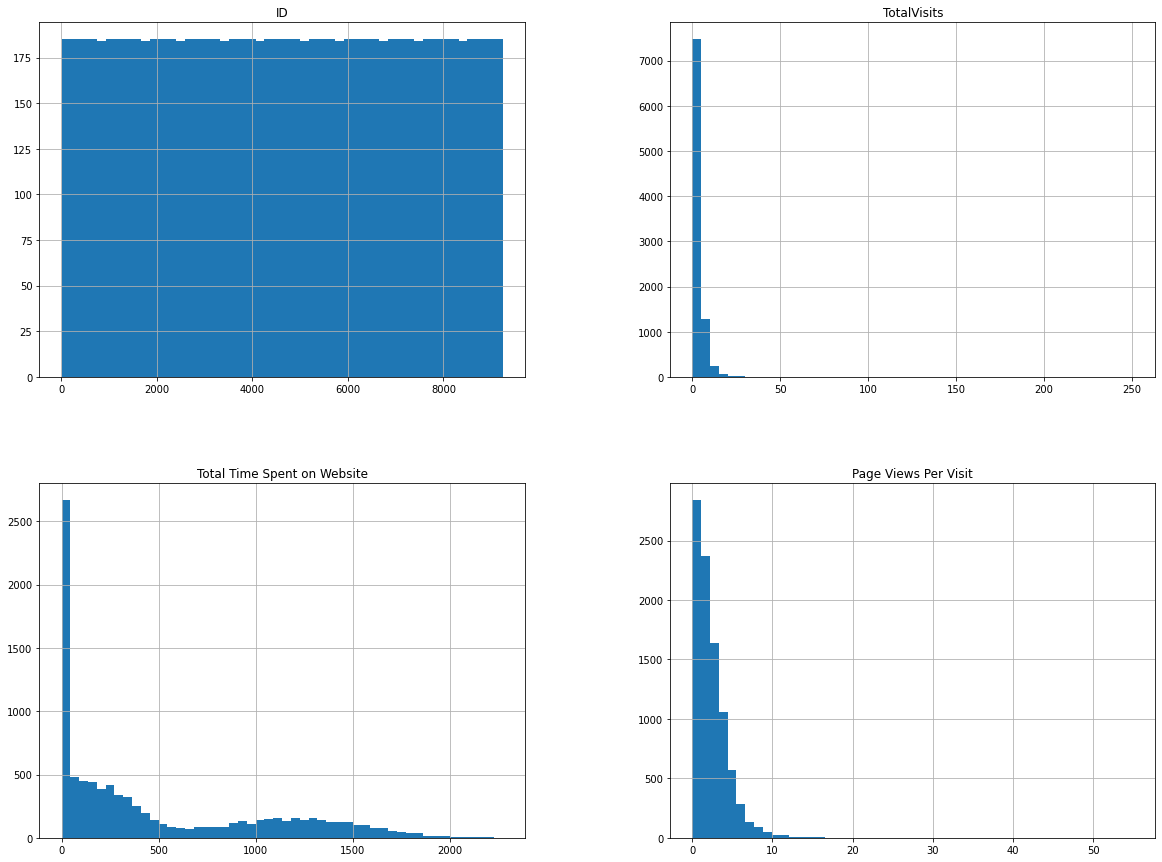

In [4]:

import matplotlib.pyplot as plt
dfa.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
dfa.Specialization.fillna('unknown', inplace = True)
dfb['Page Views Per Visit'].fillna(0, inplace = True)
dfb.TotalVisits.fillna(0, inplace = True)
dfa['Page Views Per Visit'].fillna(0, inplace = True)
dfa.TotalVisits.fillna(0, inplace = True)
dfb.Country.fillna('unknown', inplace = True)
dfb.Specialization.fillna('unknown', inplace = True)
dfb['How did you hear about Us'].fillna('unknown', inplace = True)
dfb.Current_Occupation.fillna('unknown', inplace = True)
dfb['What matters most to you in choosing a course'].fillna('unknown', inplace = True)
dfb.Source.fillna(0, inplace = True)
dfb['Last Activity'].fillna('unknown', inplace = True)

In [ ]:
dfa.isnull().sum()

ID                             0
Purchased                      0
Do Not Email                   0
Do Not Call                    0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
Specialization                 0
Origin                         0
dtype: int64

In [ ]:
dfb.isnull().sum()

ID                                               0
Country                                          0
Specialization                                   0
How did you hear about Us                        0
Current_Occupation                               0
What matters most to you in choosing a course    0
Origin                                           0
Source                                           0
Do Not Email                                     0
Do Not Call                                      0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Purchased                                        0
dtype: int64

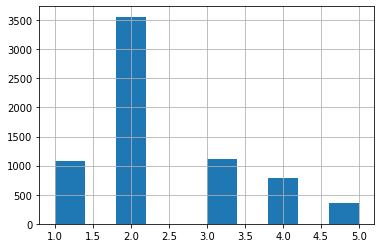

In [6]:
dfa["income_cat"] = pd.cut(dfa["Page Views Per Visit"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

dfa["income_cat"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ee81d4c10>,
      dtype=object)

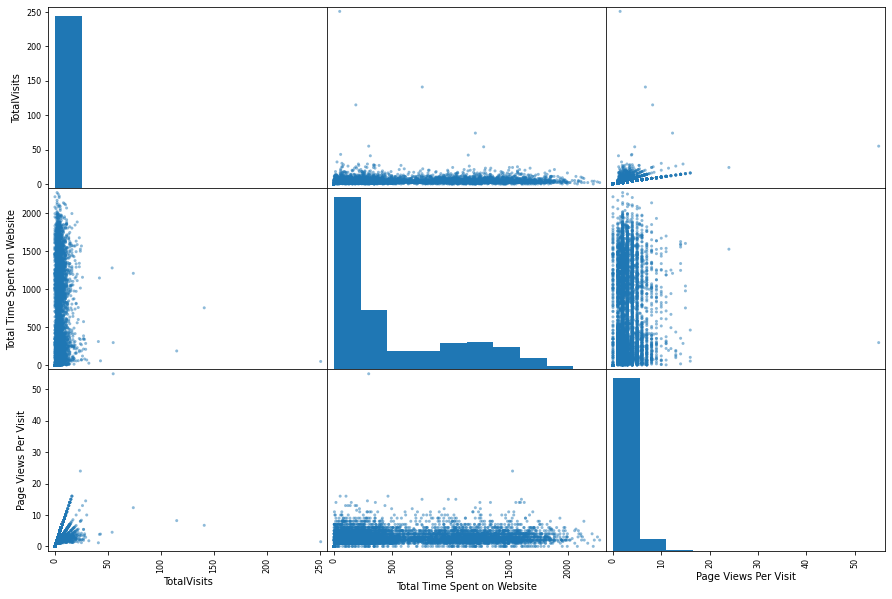

In [7]:
from pandas.plotting import scatter_matrix
attributes = ["Purchased", "TotalVisits", "Total Time Spent on Website",
"Page Views Per Visit",'Specialization','Origin']
scatter_matrix(dfa[attributes], figsize=(15, 10))

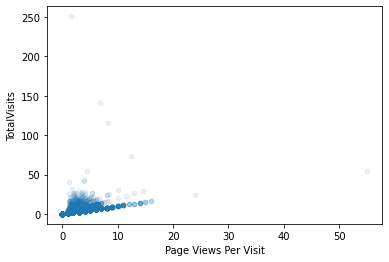

In [8]:
dfa.plot(kind="scatter", x="Page Views Per Visit", y="TotalVisits",
alpha=0.1)

In [9]:
corr_matrix = dfa.corr()
corr_matrix

,ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit
ID,1.000000,-0.016931,-0.019775,-0.048718
TotalVisits,-0.016931,1.000000,0.209468,0.517122
Total Time Spent on Website,-0.019775,0.209468,1.000000,0.301036
Page Views Per Visit,-0.048718,0.517122,0.301036,1.000000


In [10]:
Origin_cat = dfa[["Origin"]]
Origin_cat.head(10)

,Origin
0,API
1,API
2,Landing Page Submission
3,Landing Page Submission
4,Landing Page Submission
5,API
6,Landing Page Submission
7,API
8,Landing Page Submission
9,API


In [11]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
Origin = ordinal_encoder.fit_transform(Origin_cat)


In [12]:
Origin[:10] 
ordinal_encoder.categories_

[array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
        'Quick Add Form'], dtype=object)]

In [13]:

Y = ordinal_encoder.fit_transform(dfa[["Purchased"]])
Special= ordinal_encoder.fit_transform(dfa[["Specialization"]])


In [15]:
Country = ordinal_encoder.fit_transform(dfb[["Country"]])
print(Country[:10])
Specialization = ordinal_encoder.fit_transform(dfb[["Specialization"]])
print(Specialization[:10])
about_Us= ordinal_encoder.fit_transform(dfb[["How did you hear about Us"]])
Current_Occupation = ordinal_encoder.fit_transform(dfb[["Current_Occupation"]])
print(Current_Occupation[:10])
matters_most= ordinal_encoder.fit_transform(dfb[["What matters most to you in choosing a course"]])
Origin = ordinal_encoder.fit_transform(dfb[["Origin"]])
#Source = ordinal_encoder.fit_transform(dfb[["Source"]])
Do_Not_Email = ordinal_encoder.fit_transform(dfb[["Do Not Email"]])
Do_Not_Call = ordinal_encoder.fit_transform(dfb[["Do Not Call"]])
Purchased = ordinal_encoder.fit_transform(dfb[["Purchased"]])
Last_Activity= ordinal_encoder.fit_transform(dfb[["Last Activity"]])


[[24.]
 [12.]
 [12.]
 [12.]
 [12.]
 [37.]
 [12.]
 [37.]
 [12.]
 [12.]]
[[ 1.]
 [18.]
 [ 1.]
 [11.]
 [18.]
 [18.]
 [16.]
 [18.]
 [ 8.]
 [ 4.]]
[[4.]
 [4.]
 [3.]
 [4.]
 [4.]
 [6.]
 [4.]
 [6.]
 [6.]
 [6.]]


In [16]:
df = pd.DataFrame({'Purchased':Purchased.flatten()})
df['Do_Not_Call']=pd.DataFrame({'Do_Not_Call':Do_Not_Call.flatten()})
df['Last_Activity']=pd.DataFrame({'Last_Activity':Last_Activity.flatten()})
df['Do_Not_Email']=pd.DataFrame({'Do_Not_Email':Do_Not_Email.flatten()})

df['Origin']=pd.DataFrame({'Origin':Origin.flatten()})
df['matters_most']=pd.DataFrame({'matters_most':matters_most.flatten()})
df['Current_Occupation ']=pd.DataFrame({'Current_Occupation ':Current_Occupation .flatten()})
df['about_Us']=pd.DataFrame({'about_Us':about_Us.flatten()})

df['Origin']=pd.DataFrame({'Origin':Origin.flatten()})
df['Specialization']=pd.DataFrame({'Specialization':Specialization.flatten()})
df['Country']=pd.DataFrame({'Country':Country.flatten()})
df['TotalVisits']=dfb['TotalVisits']
df['Total Time Spent on Website']=dfb['Total Time Spent on Website']
df['Page Views Per Visit']=dfb['Page Views Per Visit']
df.to_csv('BI.csv')
x= df.drop("Purchased",axis= 1)
y=df["Purchased"]
x

,Do_Not_Call,Last_Activity,Do_Not_Email,Origin,matters_most,Current_Occupation,about_Us,Specialization,Country,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.0,10.0,0.0,0.0,0.0,4.0,8.0,1.0,24.0,0.0,0,0.00
1,0.0,5.0,0.0,0.0,0.0,4.0,9.0,18.0,12.0,5.0,674,2.50
2,0.0,5.0,0.0,1.0,0.0,3.0,9.0,1.0,12.0,2.0,1532,2.00
3,0.0,13.0,0.0,1.0,0.0,4.0,8.0,11.0,12.0,1.0,305,1.00
4,0.0,1.0,0.0,1.0,0.0,4.0,4.0,18.0,12.0,2.0,1428,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0.0,4.0,1.0,1.0,0.0,4.0,9.0,8.0,25.0,8.0,1845,2.67
9236,0.0,12.0,0.0,1.0,0.0,4.0,9.0,11.0,12.0,2.0,238,2.00
9237,0.0,12.0,1.0,1.0,0.0,4.0,9.0,1.0,12.0,2.0,199,2.00
9238,0.0,12.0,0.0,1.0,3.0,6.0,3.0,7.0,12.0,3.0,499,3.00


In [17]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
Email_cat_1hot = cat_encoder.fit_transform(dfa[["Do Not Email"]])
Email=Email_cat_1hot.toarray()

In [18]:
Call_cat_1hot = cat_encoder.fit_transform(dfa[["Do Not Call"]])

Call=Call_cat_1hot.toarray()

In [20]:
corr_matrix = x.corr()
corr_matrix

,Do_Not_Call,Last_Activity,Do_Not_Email,Origin,matters_most,Current_Occupation,about_Us,Specialization,Country,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Do_Not_Call,1.000000,-0.003161,-0.004322,0.006909,-0.009481,-0.009691,-0.017388,-0.009536,0.007109,0.003364,0.006801,-0.005628
Last_Activity,-0.003161,1.000000,-0.038383,0.108448,-0.084619,-0.042727,-0.005202,-0.003297,0.085702,0.039303,0.086314,0.031586
Do_Not_Email,-0.004322,-0.038383,1.000000,0.053296,0.058640,0.034835,0.059454,-0.011241,-0.033520,0.033736,-0.046374,0.033445
Origin,0.006909,0.108448,0.053296,1.000000,-0.230645,-0.182637,-0.172772,-0.453538,-0.049019,0.056882,0.088852,0.110814
matters_most,-0.009481,-0.084619,0.058640,-0.230645,1.000000,0.918750,0.042375,0.183554,0.070886,-0.040340,-0.150857,-0.066075
Current_Occupation,-0.009691,-0.042727,0.034835,-0.182637,0.918750,1.000000,0.035806,0.136261,0.079134,-0.044540,-0.119172,-0.064075
about_Us,-0.017388,-0.005202,0.059454,-0.172772,0.042375,0.035806,1.000000,0.294928,0.274174,-0.158100,-0.157505,-0.238049
Specialization,-0.009536,-0.003297,-0.011241,-0.453538,0.183554,0.136261,0.294928,1.000000,0.375436,-0.192103,-0.225192,-0.313872
Country,0.007109,0.085702,-0.033520,-0.049019,0.070886,0.079134,0.274174,0.375436,1.000000,-0.386901,-0.426369,-0.593980
TotalVisits,0.003364,0.039303,0.033736,0.056882,-0.040340,-0.044540,-0.158100,-0.192103,-0.386901,1.000000,0.209468,0.517122


In [21]:
x.columns

Index(['Do_Not_Call', 'Last_Activity', 'Do_Not_Email', 'Origin',
       'matters_most', 'Current_Occupation ', 'about_Us', 'Specialization',
       'Country', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [22]:
Yb = pd.get_dummies(y).values
Yb

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]], dtype=uint8)

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,Yb,test_size = 0.25, random_state =42)

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , InputLayer , Dropout

In [25]:
model1 = Sequential()

model1.add(Dense(6, input_shape = (12,),kernel_initializer='he_uniform',activation='relu'))
model1.add(Dense(2, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 2)                 14        
                                                                 
Total params: 92
Trainable params: 92
Non-trainable params: 0
_________________________________________________________________


In [26]:
model1.compile(optimizer="adam",
              loss= "categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
model1.get_weights()

[array([[ 0.5498701 , -0.4476022 ,  0.2886951 ,  0.2800166 , -0.65109026,
          0.38344556],
        [-0.61134595,  0.08024591, -0.63382536, -0.4673947 ,  0.32970315,
          0.1778    ],
        [ 0.24496573,  0.26891947, -0.10782158, -0.43276888, -0.59046686,
         -0.39777893],
        [-0.09657091,  0.5148738 ,  0.06836373, -0.31224322, -0.36543307,
          0.5741702 ],
        [-0.34673992,  0.5369144 , -0.28280148, -0.43530595,  0.02755761,
          0.03174734],
        [ 0.64081293, -0.6197065 , -0.02716112, -0.18211281,  0.20535308,
         -0.08148402],
        [-0.13462055, -0.13798356,  0.45258957,  0.6703492 ,  0.01605237,
         -0.6420344 ],
        [-0.46214205,  0.62505406,  0.05684465, -0.04522878,  0.5929474 ,
         -0.31533042],
        [-0.37793684,  0.4593976 ,  0.46654385, -0.37416068, -0.5179131 ,
          0.6624386 ],
        [ 0.5685062 , -0.53263956, -0.28116667,  0.09937078,  0.43925804,
          0.14830613],
        [-0.69457805,  0.37615

In [28]:
model1.fit(x_train, y_train, epochs= 100)

Epoch 1/100
217/217 [==============================] - 1s 2ms/step - loss: 71.2755 - accuracy: 0.5492
Epoch 2/100
217/217 [==============================] - 0s 2ms/step - loss: 1.5800 - accuracy: 0.6309
Epoch 3/100
217/217 [==============================] - 0s 2ms/step - loss: 1.0749 - accuracy: 0.7450
Epoch 4/100
217/217 [==============================] - 0s 2ms/step - loss: 0.9611 - accuracy: 0.7479
Epoch 5/100
217/217 [==============================] - 0s 2ms/step - loss: 0.8666 - accuracy: 0.7579
Epoch 6/100
217/217 [==============================] - 0s 2ms/step - loss: 0.7996 - accuracy: 0.7502
Epoch 7/100
217/217 [==============================] - 0s 2ms/step - loss: 0.7394 - accuracy: 0.7473
Epoch 8/100
217/217 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.7545
Epoch 9/100
217/217 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.7517
Epoch 10/100
217/217 [==============================] - 0s 2ms/step - loss: 0.5903 - accur

In [29]:
model1.evaluate(x_test,y_test)

73/73 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.7905


[0.45843636989593506, 0.7904762029647827]

In [30]:
y_predict1 = model1.predict(x_test)
y_predict1

array([[0.72659993, 0.27340007],
       [0.9612574 , 0.03874255],
       [0.9985385 , 0.0014615 ],
       ...,
       [0.5500787 , 0.44992125],
       [0.11403511, 0.8859649 ],
       [0.9661874 , 0.03381262]], dtype=float32)

In [32]:
import pickle
pickle.dump(model1, open("AI-model.pkl", "wb"))

INFO:tensorflow:Assets written to: ram://7504c97e-febf-4ae7-83fc-5dc7a4ff1320/assets


In [33]:
print(y_test)

[[0 1]
 [1 0]
 [1 0]
 ...
 [0 1]
 [1 0]
 [1 0]]


In [34]:
y_test_class = np.argmax(y_test, axis=1)
y_predict_class = np.argmax(y_predict1, axis=1)

In [35]:
y_test_class.shape

(2310,)

In [36]:
y_test_class

array([1, 0, 0, ..., 1, 0, 0])

In [37]:
y_predict_class.shape

(2310,)

In [38]:
y_predict_class

array([0, 0, 0, ..., 0, 1, 0])

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test_class, y_predict_class))
print(confusion_matrix (y_test_class, y_predict_class))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1404
           1       0.71      0.78      0.74       906

    accuracy                           0.79      2310
   macro avg       0.78      0.79      0.78      2310
weighted avg       0.80      0.79      0.79      2310

[[1119  285]
 [ 199  707]]


In [40]:
dfa.columns

Index(['ID', 'Purchased', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'Origin', 'income_cat'],
      dtype='object')

In [41]:
dft = pd.DataFrame({'Purchased':Y.flatten()})


dft['Email']=pd.DataFrame({'Email':Email.flatten()})

dft['Call']=pd.DataFrame({'Call':Call.flatten()})
dft['Special']=pd.DataFrame({'Special':Special.flatten()})



dft['Origin']=pd.DataFrame({'Origin':Origin.flatten()})


dft['TotalVisits']=dfa['TotalVisits']
dft['Total Time Spent on Website']=dfa['Total Time Spent on Website']
dft['Page Views Per Visit']=dfa['Page Views Per Visit']




In [42]:
dft.to_csv('AI.csv')

In [52]:
corr_matrix = dft.corr()
corr_matrix

,Purchased,Email,Call,Special,Origin,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Purchased,1.000000,-0.004225,-0.011341,-0.135032,0.223725,0.022502,0.362483,-0.014725
Email,-0.004225,1.000000,0.894805,0.008658,-0.014861,-0.003491,-0.004940,-0.027782
Call,-0.011341,0.894805,1.000000,0.006582,-0.009395,-0.005773,-0.005711,-0.022083
Special,-0.135032,0.008658,0.006582,1.000000,-0.453914,-0.192332,-0.225480,-0.314224
Origin,0.223725,-0.014861,-0.009395,-0.453914,1.000000,0.056882,0.088852,0.110814
TotalVisits,0.022502,-0.003491,-0.005773,-0.192332,0.056882,1.000000,0.209468,0.517122
Total Time Spent on Website,0.362483,-0.004940,-0.005711,-0.225480,0.088852,0.209468,1.000000,0.301036
Page Views Per Visit,-0.014725,-0.027782,-0.022083,-0.314224,0.110814,0.517122,0.301036,1.000000


In [43]:
X= dft.drop("Purchased",axis= 1)
Y=dft["Purchased"]

In [44]:
headers = list(X)
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.33, stratify=Y, random_state=0)

print(train_X.shape, test_X.shape)
print()
print('Number of rows in Train dataset: {train_df.shape[0]}')
print(train_Y.value_counts())
print()
print('Number of rows in Test dataset: {test_df.shape[0]}')
print(test_Y.value_counts())

(6190, 7) (3050, 7)

Number of rows in Train dataset: {train_df.shape[0]}
0.0    3804
1.0    2386
Name: Purchased, dtype: int64

Number of rows in Test dataset: {test_df.shape[0]}
0.0    1875
1.0    1175
Name: Purchased, dtype: int64


In [45]:
import xgboost as xgb



In [46]:

model = xgb.XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=300,
                        learning_rate = 0.01)
eval_set = [(train_X, train_Y), (test_X, test_Y)]
model.fit(train_X, train_Y.values.ravel(), early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.217124	validation_0-logloss:0.689205	validation_1-error:0.243934	validation_1-logloss:0.689505
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.199192	validation_0-logloss:0.685271	validation_1-error:0.217705	validation_1-logloss:0.685752
[2]	validation_0-error:0.193215	validation_0-logloss:0.681565	validation_1-error:0.209508	validation_1-logloss:0.682312
[3]	validation_0-error:0.191438	validation_0-logloss:0.677725	validation_1-error:0.208525	validation_1-logloss:0.678718
[4]	validation_0-error:0.191115	validation_0-logloss:0.674126	validation_1-error:0.20623	validation_1-logloss:0.675336
[5]	validation_0-error:0.190953	validation_0-logloss:0.670494	validation_1-error:0.205902	validation_1-logloss:0.671977
[6]	validation_0-error:0.193215	validation_0-logloss:0.666974	validation_1-error:0.205902	validation_1-logloss:0.668

XGBClassifier(learning_rate=0.01, max_depth=12, n_estimators=300,
              subsample=0.33)

In [47]:
y_pred = model.predict(test_X)
y_pred

array([1., 0., 0., ..., 0., 1., 1.])

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(test_Y, y_pred))
print(confusion_matrix (test_Y, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83      1875
         1.0       0.74      0.71      0.72      1175

    accuracy                           0.79      3050
   macro avg       0.78      0.78      0.78      3050
weighted avg       0.79      0.79      0.79      3050

[[1588  287]
 [ 345  830]]


In [49]:
pickle.dump(model, open("BI-model.pkl", "wb"))

In [50]:
from matplotlib import pyplot

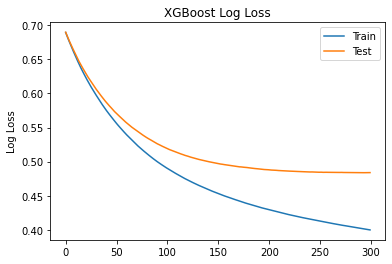

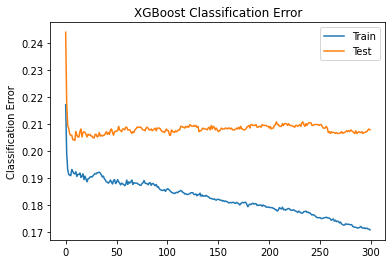

In [51]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()